# Treinamento de um Classificador de Imagens Usando CNN

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Etapa 1: Pré-processamento do Dataset

### Definindo os parâmetros

In [2]:
image_size = (128, 128) 
batch_size = 32        
train_dir = 'sample_mel_spec' 

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2)


### Gerador de dados para treinamento e validação

In [3]:

# Gerador para os dados de treinamento
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Gerador para os dados de validação
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 3942 images belonging to 2 classes.
Found 984 images belonging to 2 classes.


In [4]:
# Exibindo o mapeamento de classes
print(train_generator.class_indices)


{'no_siren': 0, 'yes_siren': 1}


## Etapa 2: Criação e Treinamento do Modelo CNN

In [21]:
model = Sequential([
    
    Input(shape=(image_size[0], image_size[1], 3)),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(2, activation='softmax')
])


In [22]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687,650 (2.62 MB)

 Trainable params: 687,650 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

### Compilando o modelo

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Treinando o modelo

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, min_lr=1e-6)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr])


Epoch 1/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 32s 250ms/step - accuracy: 0.8413 - loss: 0.3791 - val_accuracy: 0.8923 - val_loss: 0.2362 - learning_rate: 0.0010
Epoch 2/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 30s 245ms/step - accuracy: 0.9440 - loss: 0.1504 - val_accuracy: 0.9187 - val_loss: 0.2071 - learning_rate: 0.0010
Epoch 3/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 251ms/step - accuracy: 0.9591 - loss: 0.1154 - val_accuracy: 0.9167 - val_loss: 0.2774 - learning_rate: 0.0010
Epoch 4/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 248ms/step - accuracy: 0.9638 - loss: 0.1026 - val_accuracy: 0.9207 - val_loss: 0.2938 - learning_rate: 0.0010
Epoch 5/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.9749 - loss: 0.0671 - val_accuracy: 0.9339 - val_loss: 0.1700 - learning_rate: 7.0000e-04
Epoch 6/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 30s 245ms/step - accuracy: 0.9784 - loss: 0.0688 - val_accuracy: 0.9451 - val_loss: 0.1672 - learning_rate: 7.0000e-04
Epoch 7/15
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accur

In [25]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,062,952 (7.87 MB)

 Trainable params: 687,650 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,375,302 (5.25 MB)

## Etapa 3: Avaliação

### Plotar Gráficos para Avaliar a Evolução do Treinamento

In [55]:
history_dict = history.history

history_df = pd.DataFrame(history_dict)


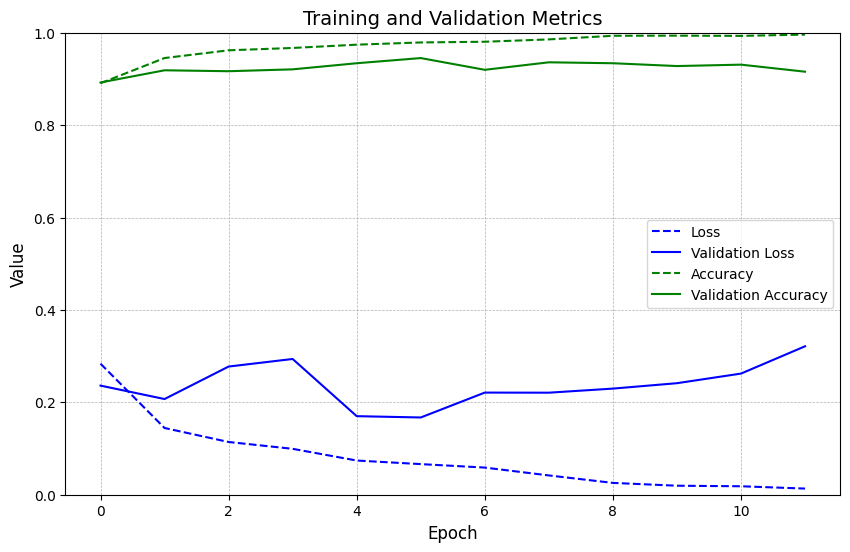

In [56]:
fig = plt.figure(figsize=(10, 6)) 
plt.style.use('default')

ax = fig.add_subplot(1, 1, 1)

ax.plot(history_df['loss'], label='Loss', color='blue', linestyle='--', linewidth=1.5)
ax.plot(history_df['val_loss'], label='Validation Loss', color='blue', linestyle='-', linewidth=1.5)
ax.plot(history_df['accuracy'], label='Accuracy', color='green', linestyle='--', linewidth=1.5)
ax.plot(history_df['val_accuracy'], label='Validation Accuracy', color='green', linestyle='-', linewidth=1.5)

ax.set_title('Training and Validation Metrics', fontsize=14)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

ax.set_ylim(0, 1.0)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()


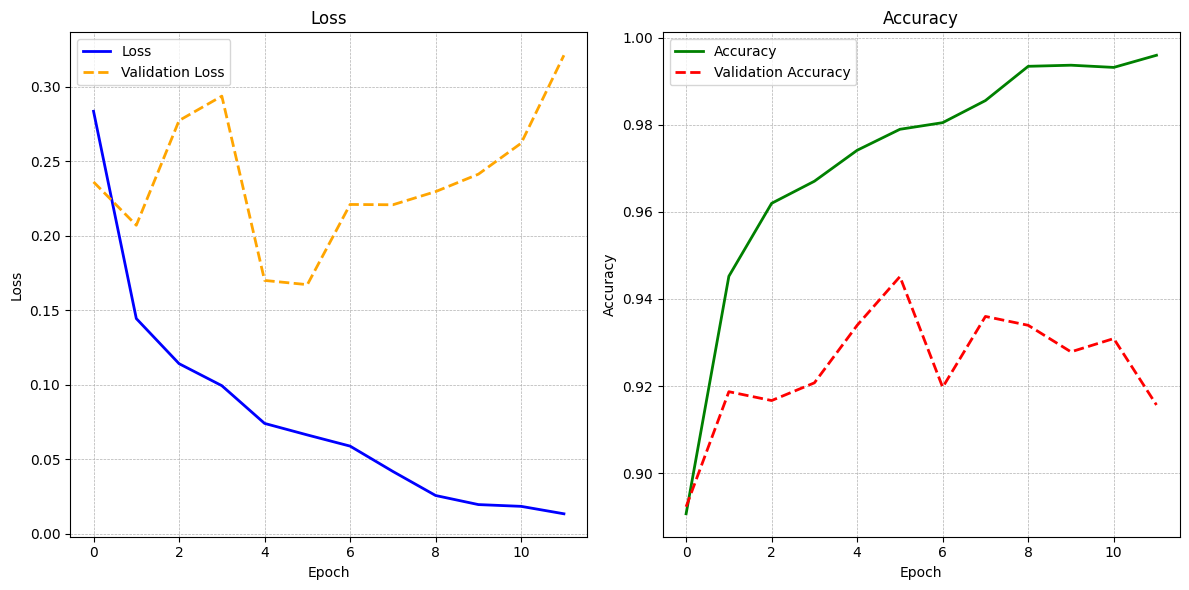

In [57]:
plt.figure(figsize=(12, 6))

plt.style.use('default')

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Loss', color='blue', linestyle='-', linewidth=2)
plt.plot(history_df['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Accuracy', color='green', linestyle='-', linewidth=2)
plt.plot(history_df['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--', linewidth=2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


## Etapa 4: Salvando o modelo

In [54]:
model.save('cnn_categorical_model_Final.keras')
print("Treinamento concluído e modelo salvo como 'cnn_classifier_model.h5'")


Treinamento concluído e modelo salvo como 'cnn_classifier_model.h5'
